<a href="https://colab.research.google.com/github/rjhalliday/python-examples/blob/main/pandas_find_peaks_advanced_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas find_peaks() advanced examples




## Simple data series

First we create a sin waveform and modulate it to create local maxima and minima

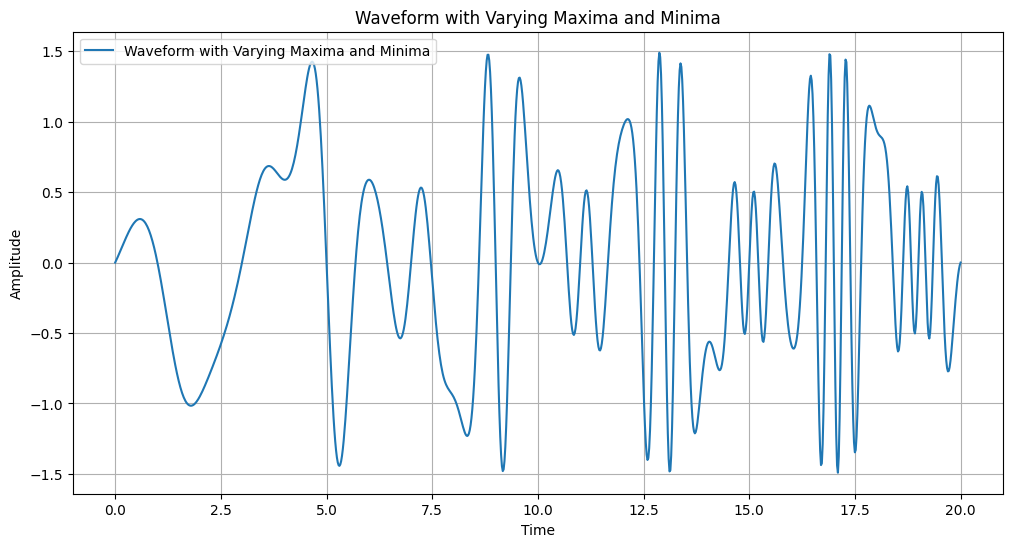

In [35]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
t_start = 0
t_end = 20
num_points = 1000

# Create a time array
t = np.linspace(t_start, t_end, num_points)

# Define a base waveform
# Using a sinusoid for the base waveform
base_waveform = np.sin(2 * np.pi * t)

# Define a varying amplitude function to modulate the waveform
# This function creates varying levels of amplitude
amplitude_variation = 1 + 0.5 * np.sin(0.5 * np.pi * t)

# Define a varying frequency function to modulate the waveform
# This function creates varying frequencies over time
frequency_variation = 0.1 * np.cos(0.5 * np.pi * t)

# Generate the final waveform by modulating both amplitude and frequency
waveform = amplitude_variation * np.sin(2 * np.pi * frequency_variation * t)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Varying Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()


# Simple find_peaks() example with no parameter tuning
Next, let's apply find_peaks to find the maxima and minima

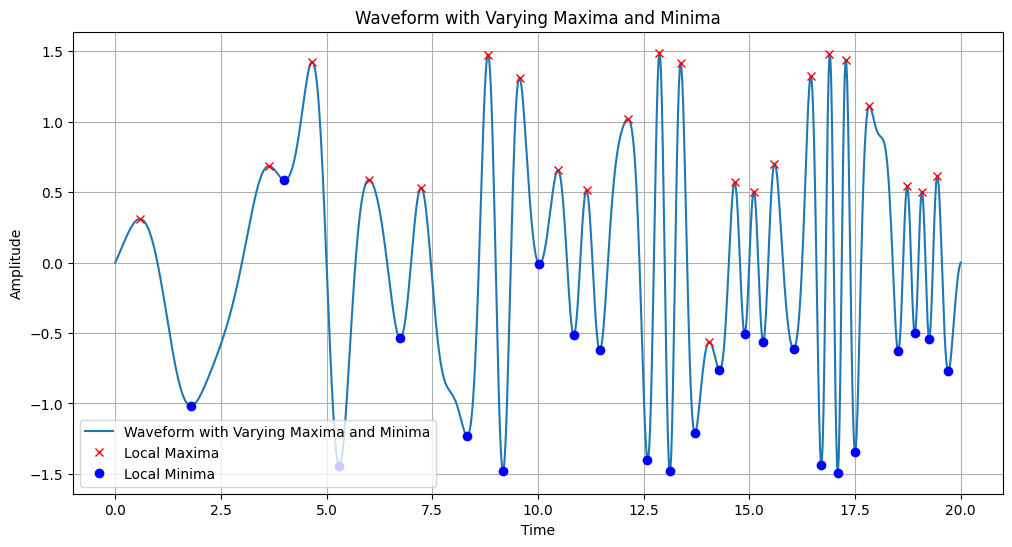

In [36]:
# Find local maxima
peaks, _ = find_peaks(waveform)

# Find local minima (by analyzing the negative of the waveform)
troughs, _ = find_peaks(-waveform)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks], waveform[peaks], 'rx', label='Local Maxima')
plt.plot(t[troughs], waveform[troughs], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Waveform with Varying Maxima and Minima')
plt.legend()
plt.grid(True)
plt.show()

##Setting the fine_peaks() height parameter
Now let's modify the parameters of find_peaks to change the result

**height** allows us to specify the minimum height of peaks, thus height=1 will find peaks at a height greater than 1.

As you can see from the result, peaks that are lower than 1 are removed. This is useful for applcations such as spectrum analysis where we are trying to identify noise peaks above the signal.

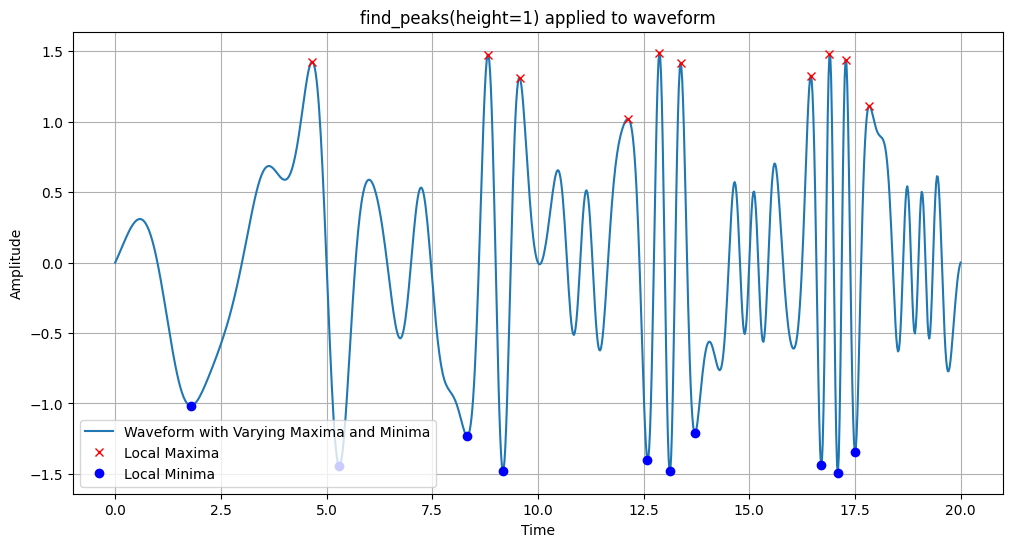

In [37]:
# Find local maxima
peaks_height, _ = find_peaks(waveform, height=1)

# Find local minima (by analyzing the negative of the waveform)
troughs_height, _ = find_peaks(-waveform, height=1)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_height], waveform[peaks_height], 'rx', label='Local Maxima')
plt.plot(t[troughs_height], waveform[troughs_height], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(height=1) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() threshold parameter

**threshold** sets the minimum vertical distance required between a peak and its neighboring samples. This is useful for finding anomalyis data points, such as noise

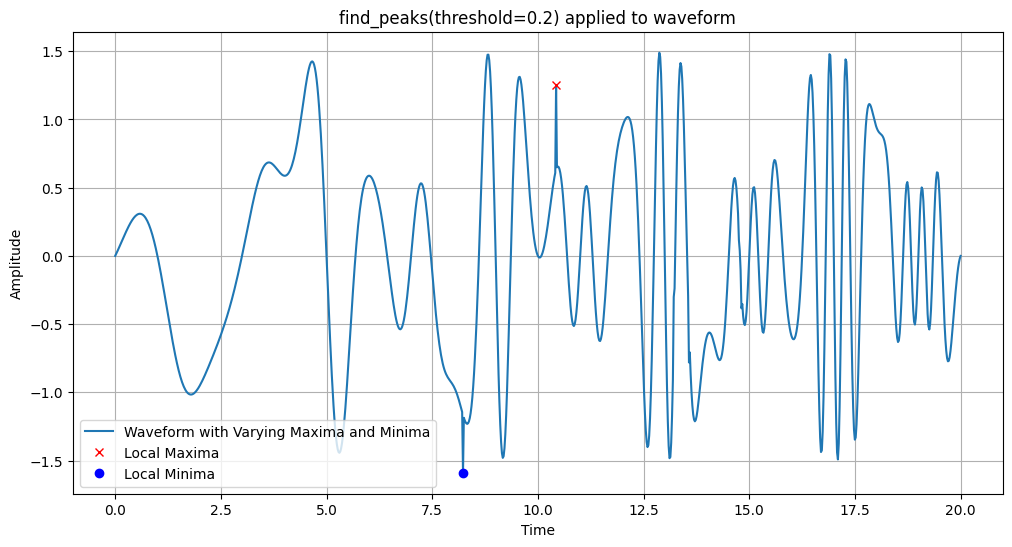

In [38]:
# first create some anomilies

# Add outliers
np.random.seed(42)  # For reproducibility
num_outliers = 6
outlier_indices = np.random.choice(len(t), num_outliers, replace=False)
outlier_magnitude = 2  # Change this to control the outlier magnitude

# Introduce outliers by modifying waveform values at the selected indices
waveform_noisy = waveform.copy()
waveform_noisy[outlier_indices] *= outlier_magnitude * (np.random.rand(num_outliers))  # Random values between -outlier_magnitude and outlier_magnitude

# Find local maxima. The peak must be 0.2 above it's neighbouring samples.
peaks_threshold, _ = find_peaks(waveform_noisy, threshold=0.2)

# Find local minima (by analyzing the negative of the waveform). . The trough must be 0.2 below it's neighbouring samples.
troughs_threshold, _ = find_peaks(-waveform_noisy, threshold=0.2)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform_noisy, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_threshold], waveform_noisy[peaks_threshold], 'rx', label='Local Maxima')
plt.plot(t[troughs_threshold], waveform_noisy[troughs_threshold], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(threshold=0.2) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() **distance** parameter

**distance** specifies the minimum number of samples between adjacent peaks. Note that the lower peaks have now been filtered out. The algorithm will retain the peak that satisfies the distance constraint. It won't automatically discard a higher peak simply because it is close to a lower peak. Instead, it will ensure that peaks are spaced according to the specified distance.

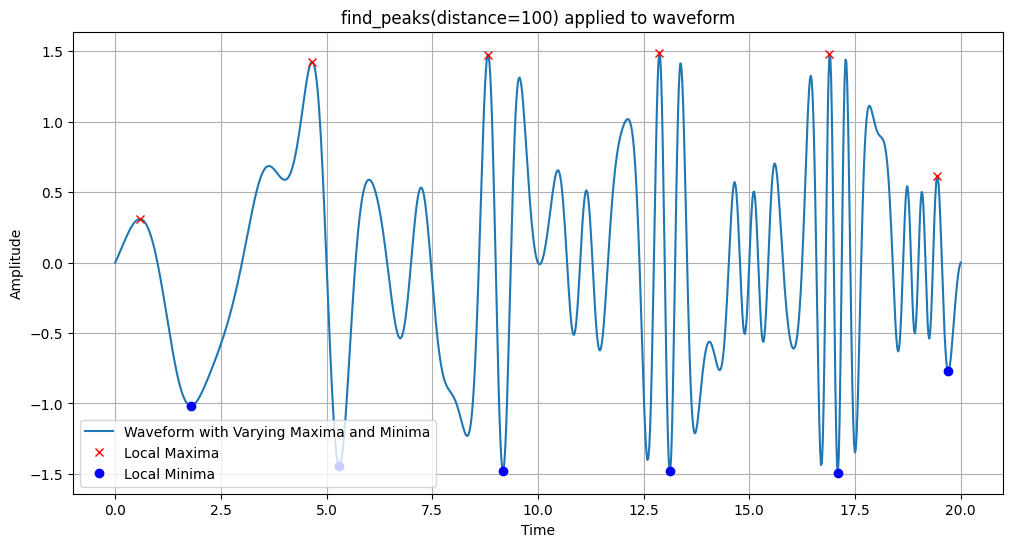

In [43]:
# Find local maxima
peaks_distance_limited, _ = find_peaks(waveform, distance=100)

# Find local minima (by analyzing the negative of the waveform)
troughs_distance_limited, _ = find_peaks(-waveform, distance=100)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_distance_limited], waveform[peaks_distance_limited], 'rx', label='Local Maxima')
plt.plot(t[troughs_distance_limited], waveform[troughs_distance_limited], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(distance=100) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() **wlem** parameter

**wlen** sets length of the window used for calculating the peak-to-peak distance. This parameter affects the smoothness of the detection. The wlen parameter defines the window size in terms of the number of samples over which local maxima are considered. For example, if wlen is set to 100, the algorithm will only look at local maxima within a window of 100 samples.

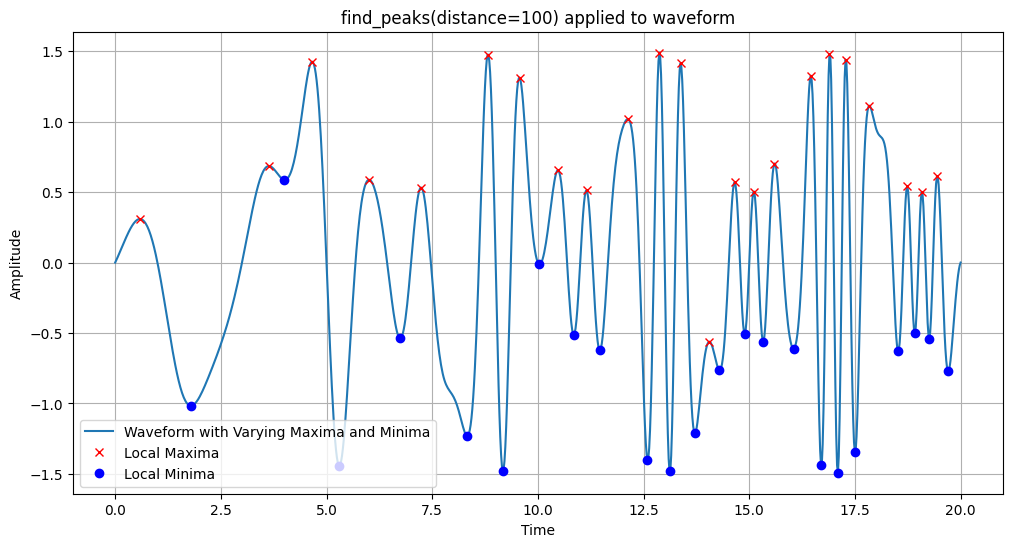

In [52]:
# Find local maxima
peaks_wlem_limited, _ = find_peaks(waveform, wlen=100)

# Find local minima (by analyzing the negative of the waveform)
troughs_wlem_limited, _ = find_peaks(-waveform, wlen=100)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_wlem_limited], waveform[peaks_wlem_limited], 'rx', label='Local Maxima')
plt.plot(t[troughs_wlem_limited], waveform[troughs_wlem_limited], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(wlen=100) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() **prominence** parameter

**prominence** defines the minimum prominence of peaks. Prominence measures how much a peak stands out from the surrounding baseline.

How Prominence Is Calculated:
* Determine the Baseline: For each peak, the baseline is the lowest contour line (or valley) that connects the peak to the points on either side that are higher than the peak.
* Measure the Prominence: The prominence of a peak is the vertical distance between the peak and the baseline. This is computed as:

In the example below, you can see that when prominence=0.75 is used, some peaks and troughs are not included; this is because the distance between the baseline and the peak is < 0.75.

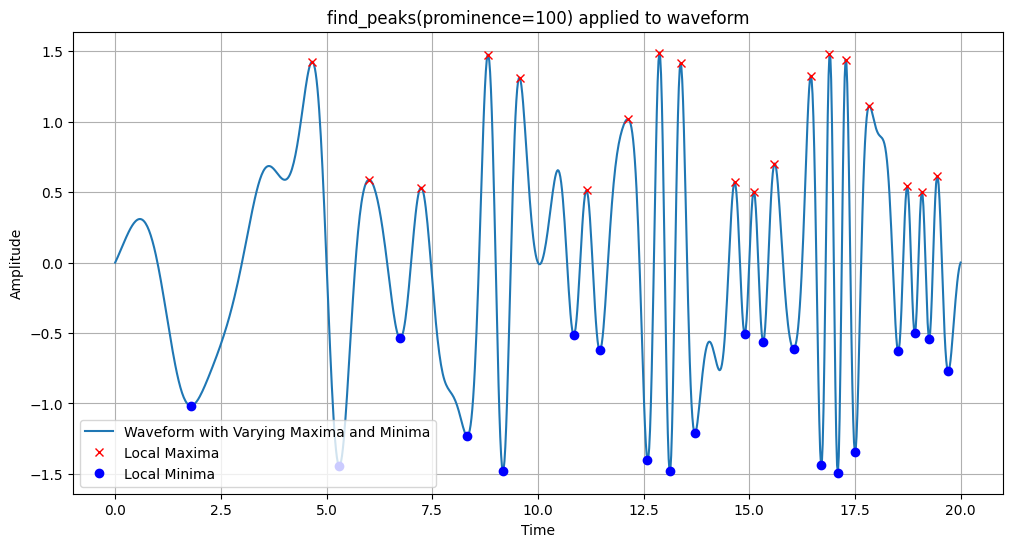

In [55]:
# Find local maxima
peaks_prominence_limited, _ = find_peaks(waveform, prominence=0.75)

# Find local minima (by analyzing the negative of the waveform)
troughs_prominence_limited, _ = find_peaks(-waveform, prominence=0.75)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_prominence_limited], waveform[peaks_prominence_limited], 'rx', label='Local Maxima')
plt.plot(t[troughs_prominence_limited], waveform[troughs_prominence_limited], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(prominence=0.75) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()

## Setting the find_peaks() **width** parameter

**width** filters peaks based on their width. The width of a peak is a measure of how broad or narrow it is. The width calculation is based on the horizontal distance between the points where the peak's height drops below a specified fraction of its maximum height.

How Width Is Calculated

1. Peak Height: Determine the height of the peak, which is the vertical distance from the peak to the baseline (the lowest point of the surrounding valleys).
2. Height Threshold: The width calculation is based on the height threshold, which is a fraction of the peak height. By default, this fraction is set to 0.5 of the peak's height, but you can specify other values.
3. Calculate the Width: The width is defined as the distance between the points on either side of the peak where the peak's height falls below the specified threshold. To find the width, the function identifies the left and right points where the height drops below the threshold and measures the distance between these points.

In the example below, you'll see that the thin (randonmly inserted), noise spikes are not identified as peaks; this is because these spikes are thin enough such that they don't meet the width criteria defined in the code of 10 samples.

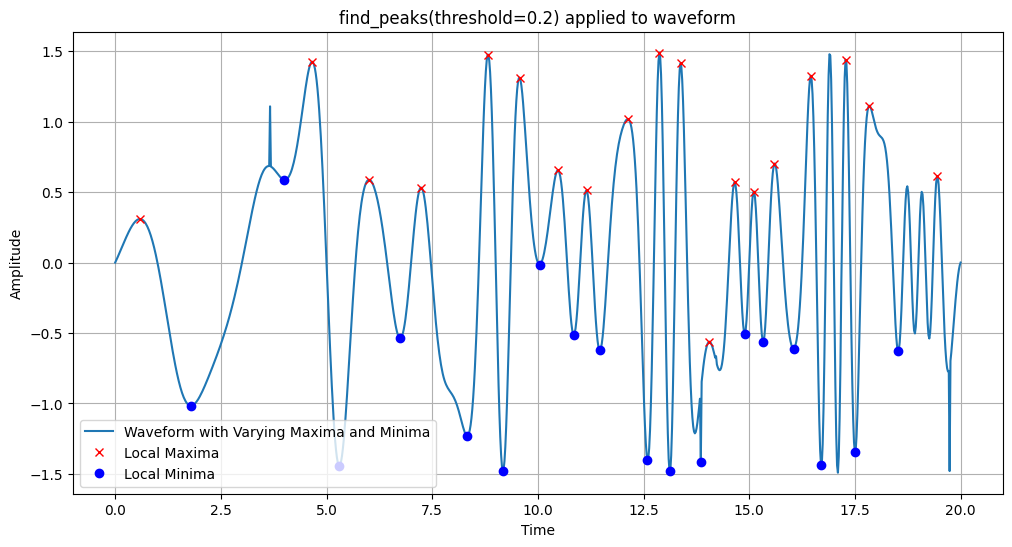

In [61]:
# first create some anomilies

# Add outliers
np.random.seed(43)  # For reproducibility
num_outliers = 6
outlier_indices = np.random.choice(len(t), num_outliers, replace=False)
outlier_magnitude = 2  # Change this to control the outlier magnitude

# Introduce outliers by modifying waveform values at the selected indices
waveform_noisy2 = waveform.copy()
waveform_noisy2[outlier_indices] *= outlier_magnitude * (np.random.rand(num_outliers))  # Random values between -outlier_magnitude and outlier_magnitude

# Find local maxima. The peak must be 0.2 above it's neighbouring samples.
peaks_width_limited, _ = find_peaks(waveform_noisy2, width=10)

# Find local minima (by analyzing the negative of the waveform). . The trough must be 0.2 below it's neighbouring samples.
troughs_width_limited, _ = find_peaks(-waveform_noisy2, width=10)

# Plot the waveform
plt.figure(figsize=(12, 6))
plt.plot(t, waveform_noisy2, label='Waveform with Varying Maxima and Minima')
plt.plot(t[peaks_width_limited], waveform_noisy2[peaks_width_limited], 'rx', label='Local Maxima')
plt.plot(t[troughs_width_limited], waveform_noisy2[troughs_width_limited], 'bo', label='Local Minima')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('find_peaks(width=0.2) applied to waveform')
plt.legend()
plt.grid(True)
plt.show()